In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import gensim
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words(['english'])

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools


# os.chdir('c:\\Users\\Owner\\Desktop\\Sem4\\Capstone\\Project\\')
# os.getcwd()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhiljoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [4]:
tweets=pd.read_csv('/Users/nikhiljoshi/Capstone Project/EDA Files/after_eda.csv')
#tweets=pd.read_csv('C:\\Users\\W0780808\\Downloads\\after_eda.csv')
tweets_orig=tweets
tweets_orig

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags
0,2022-05-28 14:07:28,1530551333899616256,@elonmusk i think twitter bird is now free. Bu...,NaN,1,1,chinesevirus
1,2022-05-28 10:07:40,1530490986001969152,@joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...,बस यहीं..,0,2,chinesevirus bollywoodias
2,2022-05-28 04:16:27,1530402599618244610,@nytimes Once again the entitled NYT wants to ...,NaN,0,0,chinesevirus
3,2022-05-27 15:47:59,1530214238320467969,#NoWonder #China's #WhiteTerror or #BlueTerror...,NaN,2,6,nowonder china whiteterror blueterror ccp free...
4,2022-05-27 15:31:08,1530210001649811458,"Hey, what a surprise, 1 year later and nada! #...",New York,1,0,justafriendlyreminder chinesevirus coverup
...,...,...,...,...,...,...,...
505101,2017-12-31 09:30:00,947399429383786496,Father returns from overseas wedding after son...,San Francisco,0,1,aapi
505102,2017-12-31 09:00:01,947391885525516288,Future unclear for White House Commission on #...,San Francisco,0,1,asian aapi
505103,2017-12-31 08:22:32,947382453009879040,Happy New year to my fav #Aapi on #Twitter @Ar...,"Lleida, España",1,0,aapi twitter
505104,2017-12-31 06:30:00,947354130661519361,NY Times called out for misstep in Asian cultu...,San Francisco,0,1,aapi


### Basic preprocessing

In [5]:
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    return phrase



In [6]:
import emoji
# Remove cant wont words
tweets['Text']=tweets['Text'].apply(lambda x : decontracted(x))

    #LOWERCASE
tweets['Text']=tweets['Text'].apply(lambda x : x.lower())

# removing emojis
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", tweets['Text'])

In [7]:
def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)


In [8]:
tweets['Text']=tweets['Text'].apply(cleaning)
tweets.head()

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags
0,2022-05-28 14:07:28,1530551333899616256,think twitter bird free cage china,NaN,1,1,chinesevirus
1,2022-05-28 10:07:40,1530490986001969152,sea change indian temperament lately yr galwan...,बस यहीं..,0,2,chinesevirus bollywoodias
2,2022-05-28 04:16:27,1530402599618244610,entitled nyt want lecture darker colored every...,NaN,0,0,chinesevirus
3,2022-05-27 15:47:59,1530214238320467969,terrorizing chinese people regime work,NaN,2,6,nowonder china whiteterror blueterror ccp free...
4,2022-05-27 15:31:08,1530210001649811458,hey surprise year later nada,New York,1,0,justafriendlyreminder chinesevirus coverup


In [9]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [10]:
tweets['Subjectivity'] = tweets['Text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['Text'].apply(getPolarity)
tweets.head()


,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,Subjectivity,Polarity
0,2022-05-28 14:07:28,1530551333899616256,think twitter bird free cage china,NaN,1,1,chinesevirus,0.8000,0.4
1,2022-05-28 10:07:40,1530490986001969152,sea change indian temperament lately yr galwan...,बस यहीं..,0,2,chinesevirus bollywoodias,0.4375,0.1
2,2022-05-28 04:16:27,1530402599618244610,entitled nyt want lecture darker colored every...,NaN,0,0,chinesevirus,0.0000,0.0
3,2022-05-27 15:47:59,1530214238320467969,terrorizing chinese people regime work,NaN,2,6,nowonder china whiteterror blueterror ccp free...,0.0000,0.0
4,2022-05-27 15:31:08,1530210001649811458,hey surprise year later nada,New York,1,0,justafriendlyreminder chinesevirus coverup,0.0000,0.0


In [11]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)
tweets.head()

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,Subjectivity,Polarity,Sentiment
0,2022-05-28 14:07:28,1530551333899616256,think twitter bird free cage china,NaN,1,1,chinesevirus,0.8000,0.4,Positive
1,2022-05-28 10:07:40,1530490986001969152,sea change indian temperament lately yr galwan...,बस यहीं..,0,2,chinesevirus bollywoodias,0.4375,0.1,Positive
2,2022-05-28 04:16:27,1530402599618244610,entitled nyt want lecture darker colored every...,NaN,0,0,chinesevirus,0.0000,0.0,Neutral
3,2022-05-27 15:47:59,1530214238320467969,terrorizing chinese people regime work,NaN,2,6,nowonder china whiteterror blueterror ccp free...,0.0000,0.0,Neutral
4,2022-05-27 15:31:08,1530210001649811458,hey surprise year later nada,New York,1,0,justafriendlyreminder chinesevirus coverup,0.0000,0.0,Neutral


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

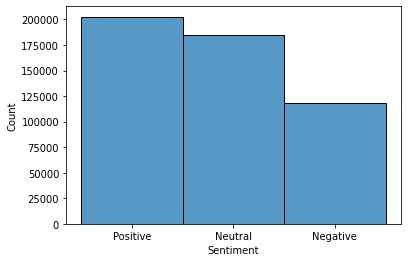

In [12]:
sns.histplot(tweets['Sentiment'])

In [13]:
# # Positive Tweets
# all_words = ' '.join([text for text in tweets['Text']]) 

# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
# plt.figure(figsize=(10, 7)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis('off')
# plt.show()
# ## We cant really see the words associated with potive or negatove tweets hence we'll plot them seperately

In [14]:
# # Negative Tweets
# normal_words =' '.join([text for text in tweets['Text'][tweets['Sentiment'] == "Negative"]]) 

# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

## Defining Training and Test Dataset

In [22]:
df=pd.read_csv('/Users/nikhiljoshi/Capstone Project/ML Models/minimum_cleaned_final_training_data.csv')
#df  =   pd.read_csv('C:\\Users\\W0780808\\Downloads\\minimum_cleaned_final_training_data.csv')
df.head()

,Tweet ID,Text,label
0,1242553623260868608,Are we still allowed to quote ancient Chinese ...,0
1,1246508137638580225,More power to you! This Chinese virus thing h...,0
2,1233468243534372865,"CNBC: WHO, Tedros reiterated that the virus co...",0
3,1243626072387747841,"""The heightened racism experienced by Asian co...",1
4,1225611530978217989,Coronavirus and Nepali in China: KP Oli has di...,0


## ML Models Start

#### Creating Corpus

In [25]:
corpus = [] # Build a new list for all the words from all the reviews

# corpus is a collection of text and a common term used in NLP
for i in range (0, len(df['Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [26]:
corpus

['still allow quot ancient chines proverb racist racismisaviru',
 'power chines viru thing realli shown us crazi low iq peopl went sam club costco morn store line wrap around build get insid fuck left disappoint human',
 'cnbc tedro reiter viru could still turn pandem urg fear panic ad greatest enemi right viru fear rumor stigma via',
 'heighten racism experienc asian commun surpris mani peopl belief racial progress widespread american societi covid racismisaviru strongertogeth asianamerican',
 'coronaviru nepali china kp oli direct offici bring back nepali wuhan china keep',
 'iamnotaviru heard use imag articl covid patient outsid china',
 'proven past year hate american america place countri risk busi fake impeach worri chines viru pelosi want tri money',
 'fact coronaviru probabl come us becom world pandem fact legaci media democrat tri blame fact ought preempt china commi nation narrow window make abundantli clear',
 'last fuck time coronaviru excus racist asian',
 'think campaign 

# Applying ML models using BOW

In [40]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).todense()
y = df.iloc[:,2].values

### Splitting data in test and training dataset

In [41]:
# Splitting into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

### Naive Bayes

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy Score is : 0.5901898734177216


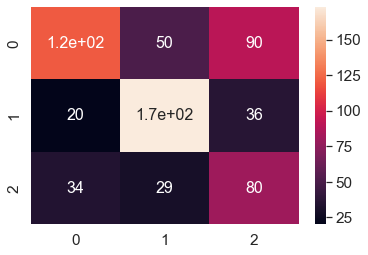

In [42]:
# Naive bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

### KNN

In [45]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy Score is : 0.5791139240506329


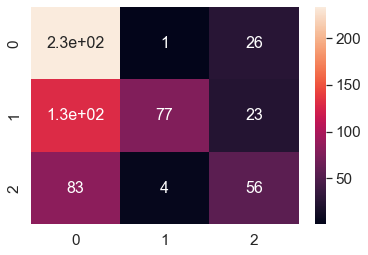

In [46]:

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

### Decision Tree

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy Score is : 0.7389240506329114


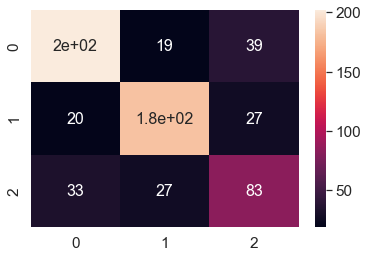

In [47]:

dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
dt_clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = dt_clf.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

### Random Forest

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy Score is : 0.754746835443038


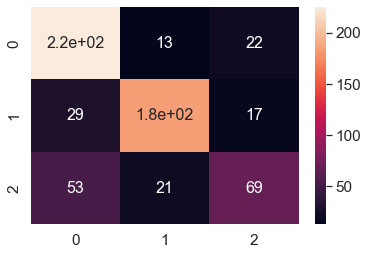

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)
# Fitting classifier to the Training set

model = RandomForestClassifier(n_estimators = 10,
                            criterion = 'entropy',random_state=0)

model.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

### SVC

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy Score is : 0.7579113924050633


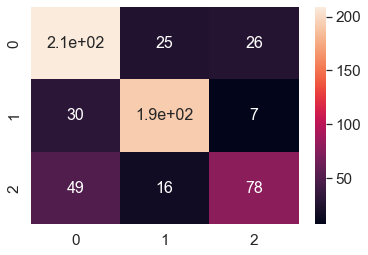

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

clf = SVC(kernel = 'linear')



# Fitting classifier to the Training set

clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = clf.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

# ML Models using TF IDF

In [65]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus2 = [] # Build a new list for all the words from all the reviews

# corpus is a collection of text and a common term used in NLP
for i in range (0, len(df['Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus2.append(review)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
corpus2 = vectorizer.fit_transform(corpus2).toarray()
X=corpus2

In [63]:
y = df.iloc[:,2].values

### Naive Bayes

Accuracy Score is : 0.5759493670886076


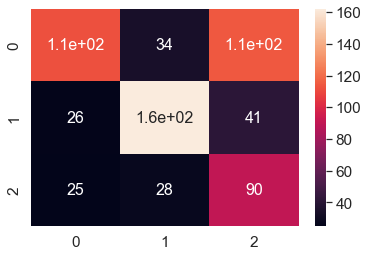

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

# Fitting classifier to the Training set

classifier=GaussianNB()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

### KNN

Accuracy Score is : 0.5917721518987342


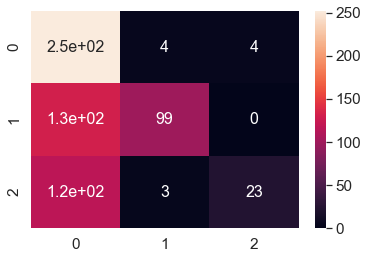

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

# Fitting classifier to the Training set

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predicting the Test set results 
y_pred=knn.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)


### Decision Tree

Accuracy Score is : 0.740506329113924


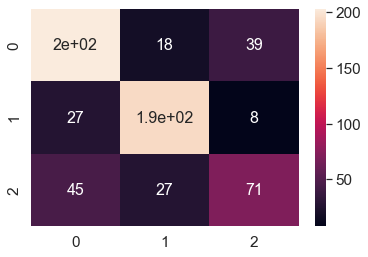

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

# Fitting classifier to the Training set

dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
dt_clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = dt_clf.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)


### Random Forest

Accuracy Score is : 0.7436708860759493


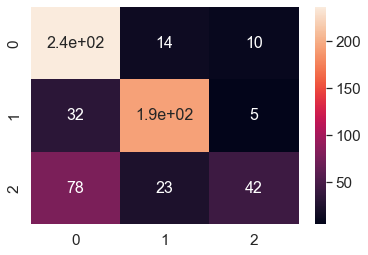

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)
# Fitting classifier to the Training set

model = RandomForestClassifier(n_estimators = 10,
                            criterion = 'entropy',random_state=0)

model.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)


### SVC

Accuracy Score is : 0.7689873417721519


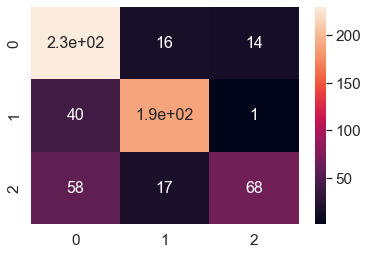

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

clf = SVC(kernel = 'linear')



# Fitting classifier to the Training set

clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = clf.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
df_cm = pd.DataFrame(Confusion_Matrix, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)
